In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
y <- 1.2; mu <- 3
cum.prob <- pexp(y, rate=1/mu); cum.prob

[1] 0.32968

In [3]:
rq <- qnorm(cum.prob); rq

[1] -0.4407971

In [4]:
y <- 1; mu <- 2.6
a <- ppois(y-1, mu); b <- ppois(y, mu)
c(a, b)

[1] 0.07427358 0.26738488

In [5]:
u <- runif(1, a, b); u

[1] 0.20166

In [6]:
rq <- qnorm( u ); rq

[1] -0.8357065

In [7]:
data(trees)
cherry.m1 <- glm( Volume ~ log(Girth) + log(Height),
family=Gamma(link=log), data=trees)
coef( cherry.m1 )

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878

In [9]:
rP <- resid( cherry.m1, type="pearson" )
rD <- resid(cherry.m1)
rQ <- qresid( cherry.m1 )

phi.est <- summary( cherry.m1 )$dispersion # Pearson estimate
rP.std <- rP / sqrt( phi.est*(1 - hatvalues(cherry.m1)) )
rD.std <- rstandard(cherry.m1)
rQ.std <- rQ / sqrt( 1 - hatvalues(cherry.m1) )
all.res <- cbind( rP, rP.std, rD, rD.std, rQ, rQ.std )
head( all.res ) # Show the first six values only

rP,rP.std,rD,rD.std,rQ,rQ.std
0.01935248,0.2620392,0.01922903,0.2603676,0.2665369,0.2893348
0.03334904,0.4558288,0.03298537,0.4508579,0.4380951,0.4800656
0.01300934,0.1811459,0.01295335,0.1803663,0.1882715,0.2101705
-0.01315583,-0.1691519,-0.01321397,-0.1698994,-0.1380666,-0.1423184
-0.04635977,-0.6169148,-0.04709620,-0.6267146,-0.5606192,-0.5980889
-0.04568564,-0.6188416,-0.04640051,-0.6285250,-0.5519432,-0.5993880



	Shapiro-Wilk normality test

data:  rQ.std
W = 0.96315, p-value = 0.3526



	Shapiro-Wilk normality test

data:  rP.std
W = 0.96781, p-value = 0.4608



	Shapiro-Wilk normality test

data:  rD.std
W = 0.9632, p-value = 0.3536


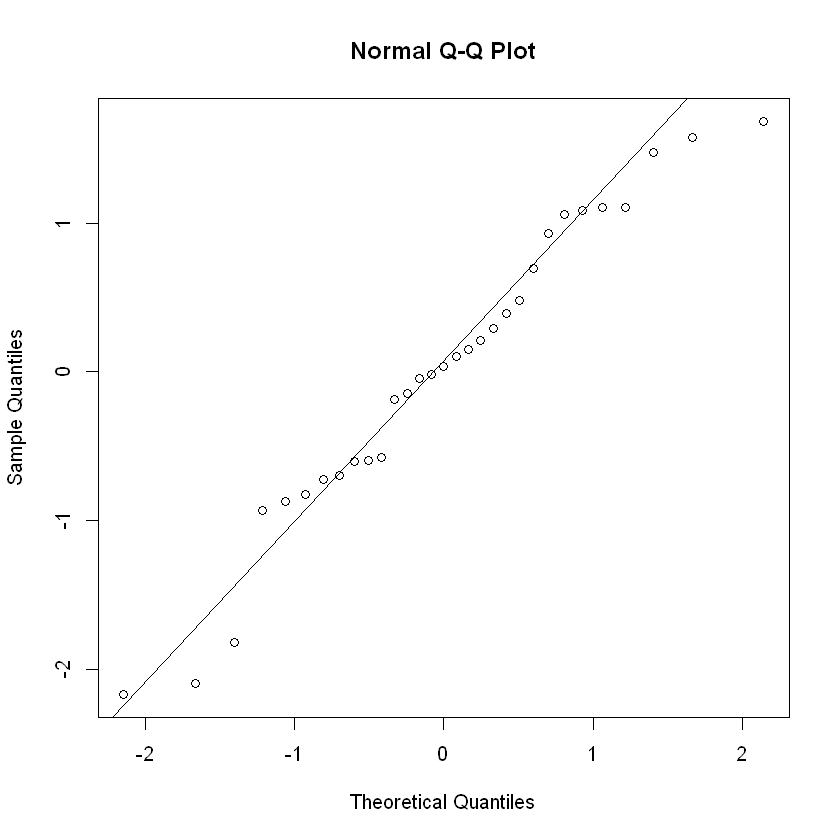

In [12]:
qqnorm(rQ.std)
qqline(rQ.std)
shapiro.test(rQ.std)
shapiro.test(rP.std)
shapiro.test(rD.std)

In [15]:
rs <- cbind( rD=resid(cherry.m1), "r'D"=rstandard(cherry.m1),
"r''"=rstudent(cherry.m1), rQ=qresid(cherry.m1))
rs

rD,r'D,r'',rQ
0.0192290343,0.260367637,0.253738160,0.26653694
0.0329853677,0.450857948,0.440812946,0.43809507
0.0129533488,0.180366316,0.175644229,0.18827154
-0.0132139678,-0.169899383,-0.165256592,-0.13806664
-0.0470961965,-0.626714555,-0.612516613,-0.56061925
-0.0464005131,-0.628525043,-0.614038619,-0.55194323
-0.0562762575,-0.748048675,-0.733037037,-0.67510580
-0.0471052837,-0.603031042,-0.589713551,-0.56073258
0.0790412907,1.033888096,1.027244468,1.01246808
0.0061423275,0.078460379,0.076312942,0.10332985


In [17]:
apply( abs(rs), 2, max)

rD      r'D      r''       rQ 
0.166763 2.197761 2.329122 2.053011

In [18]:
im <- influence.measures(cherry.m1); names(im)

[1] "infmat" "is.inf" "call"

In [19]:
im$infmat <- round(im$infmat, 3 ); head( im$infmat )

dfb.1_,dfb.l(G),dfb.l(H),dffit,cov.r,cook.d,hat
0.015,-0.083,0.005,0.107,1.305,0.004,0.151
0.120,-0.082,-0.090,0.197,1.311,0.014,0.167
0.065,-0.021,-0.054,0.087,1.385,0.003,0.198
-0.011,0.021,0.004,-0.041,1.181,0.001,0.059
0.145,0.171,-0.170,-0.228,1.218,0.018,0.121
0.186,0.191,-0.212,-0.261,1.261,0.023,0.152


In [20]:
colSums( im$is.inf )

dfb.1_ dfb.l(G) dfb.l(H)    dffit    cov.r   cook.d      hat 
       0        0        0        0        3        0        0

In [21]:
rowSums(im$is.inf)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 
27 28 29 30 31 
 0  0  0  0  1

In [22]:
cherry.cd <- cooks.distance( cherry.m1)

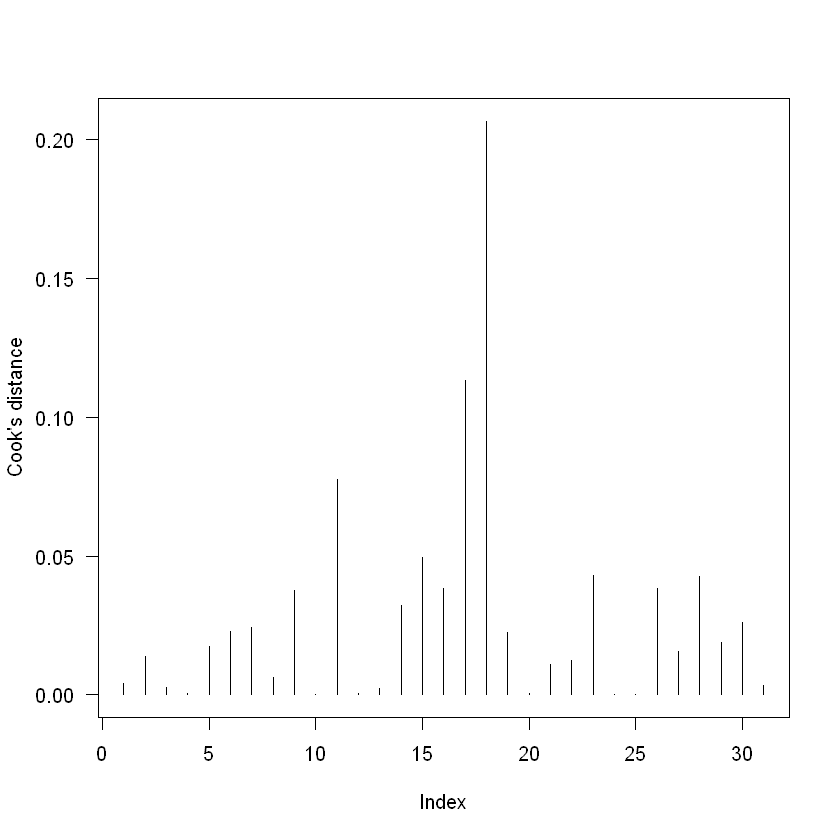

In [23]:
plot( cherry.cd, type="h", ylab="Cook's distance", las=1)

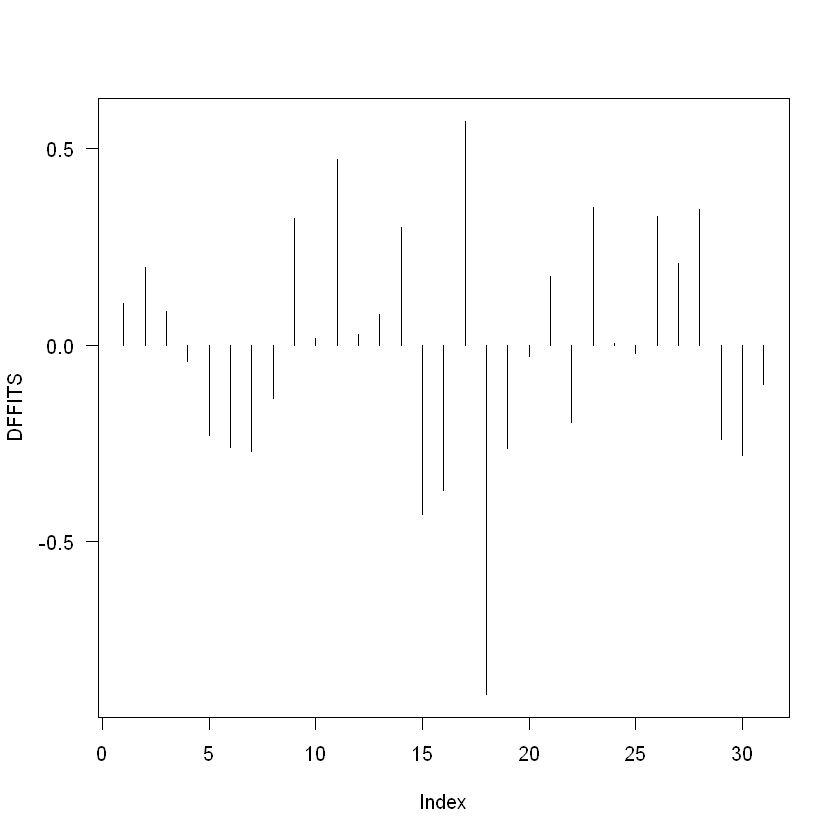

In [25]:
plot( dffits(cherry.m1), type="h", las=1, ylab="DFFITS")

In [26]:
infl <- which.max(cherry.cd) # The Observation number of largest D

In [27]:
infl
cherry.cd[infl] # The value of D for that observation

18 
18

18 
0.2067211

In [28]:
cherry.infl <- update(cherry.m1, subset=(-infl) )

In [29]:
coef(cherry.m1)

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878

In [30]:
coef(cherry.infl)

(Intercept)  log(Girth) log(Height) 
  -7.209148    1.957366    1.267528

In [32]:
cherry.omit1 <- update(cherry.m1, subset=(-1) ) # Omit Obs. 1
coef(cherry.m1)
coef(cherry.omit1)

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878

(Intercept)  log(Girth) log(Height) 
  -6.703461    1.986711    1.131840

In [33]:
m.naive <- glm( Volume ~ Girth + Height, data=trees, family=Gamma)

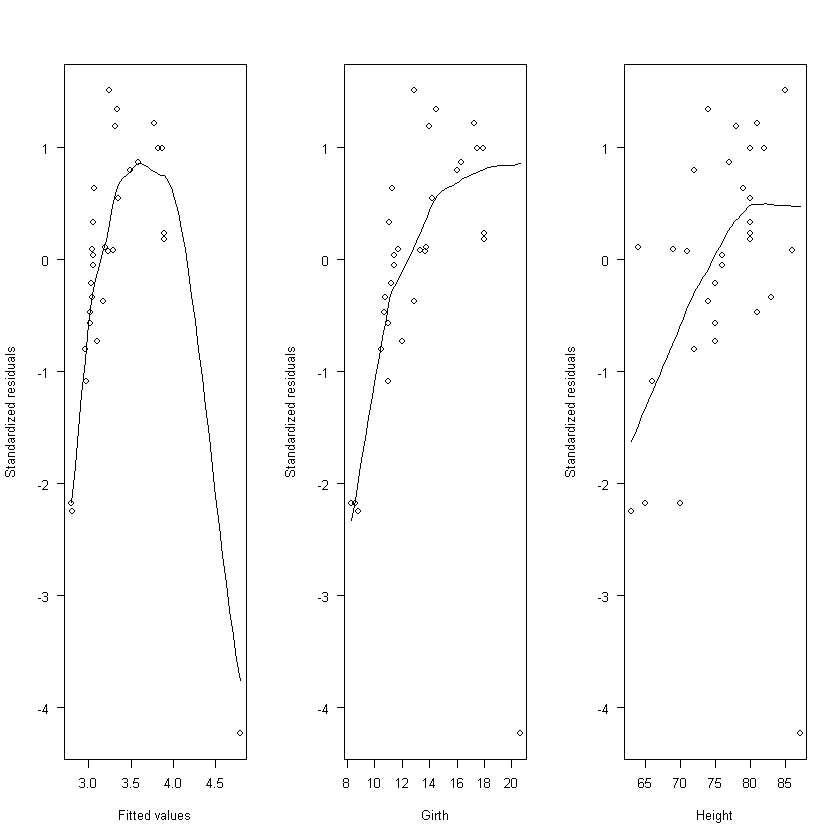

In [34]:
par(mfrow=c(1, 3))
scatter.smooth( rstandard(m.naive) ~ log(fitted(m.naive)), las=1,
xlab="Fitted values", ylab="Standardized residuals")
scatter.smooth( rstandard(m.naive) ~ trees$Girth, las=1,
xlab="Girth", ylab="Standardized residuals")
scatter.smooth( rstandard(m.naive) ~ trees$Height, las=1,
xlab="Height", ylab="Standardized residuals")

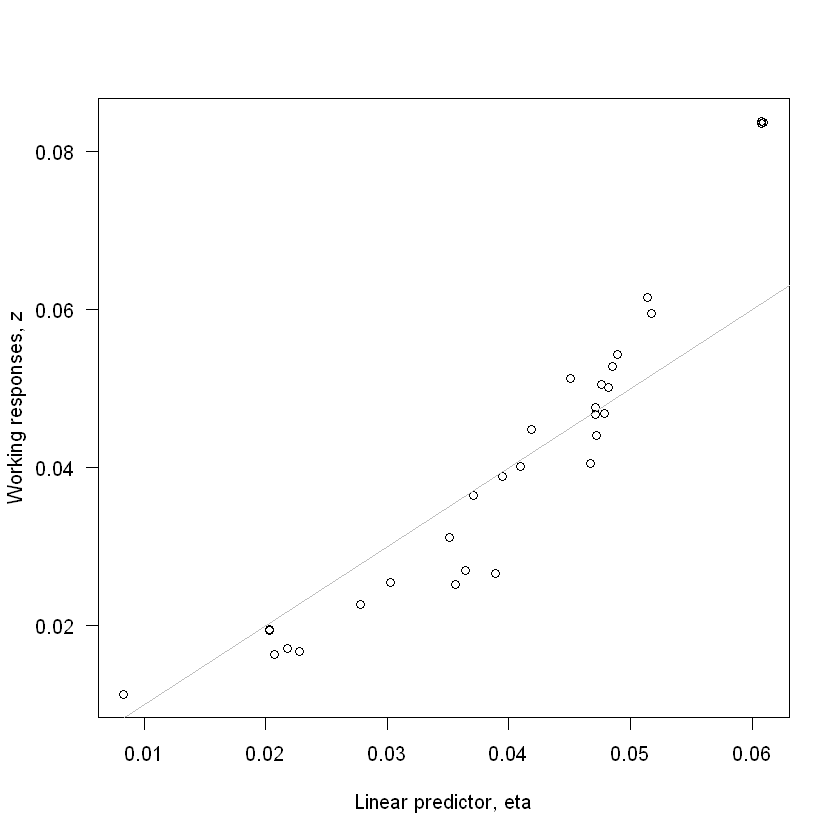

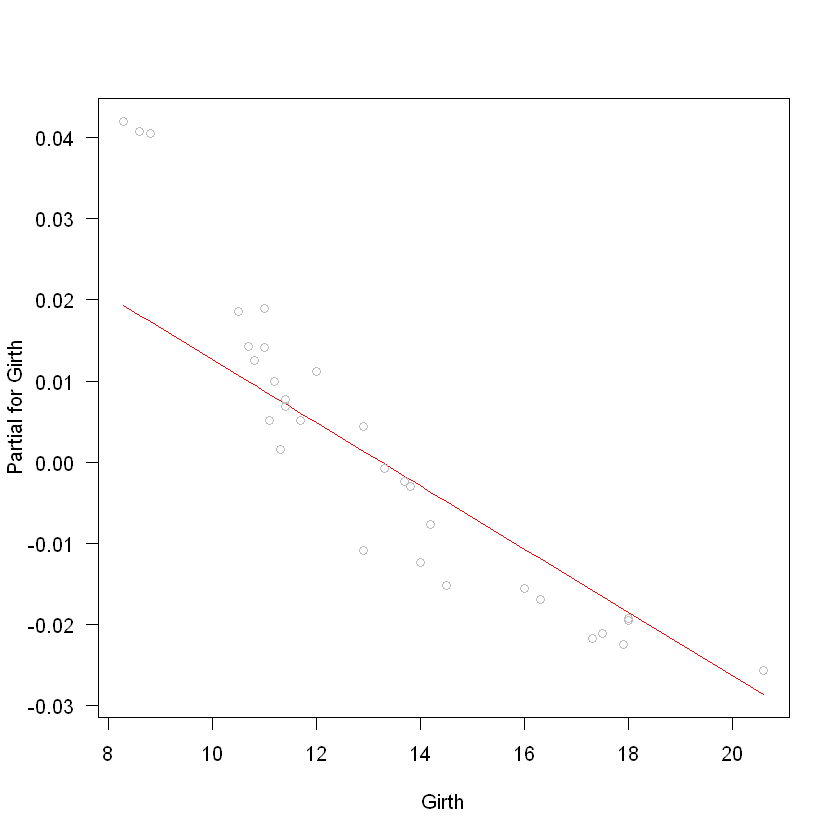

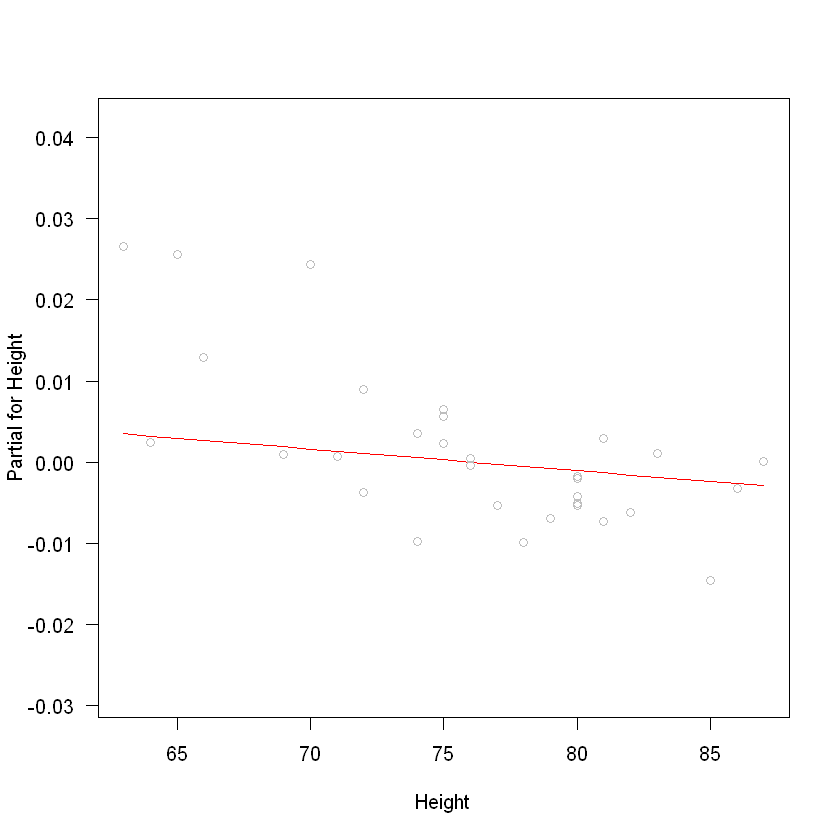

In [35]:
eta <- m.naive$linear.predictor
z <- resid(m.naive, type="working") + eta
plot( z ~ eta, las=1,
xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")
termplot(m.naive, partial.resid=TRUE, las=1)